Author: Amalia Karalis
Date: 24/03/2022
Collaborators: Jasmine Parsons

We want to evolve a strong adiabatic shock with $\gamma$=5/3 and reflective boudary conditions on both sides. The hydro equations we need to solve are:

Mass Conservation:
$$ \partial_t \rho + \partial_x(\rho u_x) = 0 $$ 

No source term.

Momentum Conservation:
$$ \partial_t(\rho u_i) + \partial_j(\rho u_i u_j) = - \partial_i(P) $$ 

The source term is the pressure gradient:
$$ \Delta(\rho u) = dt/dx * \Delta(P) = \dfrac{dt}{dx} \dfrac{c_s^2}{\gamma} \Delta(\rho) $$

Energy Conservation:
$$ \partial_t (\rho E) + \partial_x(\rho E u) = -\partial_x(\rho P u) $$

The source term is again the pressure gradient term:
$$ \Delta(\rho E) = dt/dx * \Delta(Pu)$$

For an adiabatic process,

P = $\kappa \rho^\gamma$

$c_s^2 = \gamma P/\rho$

<IPython.core.display.Javascript object>


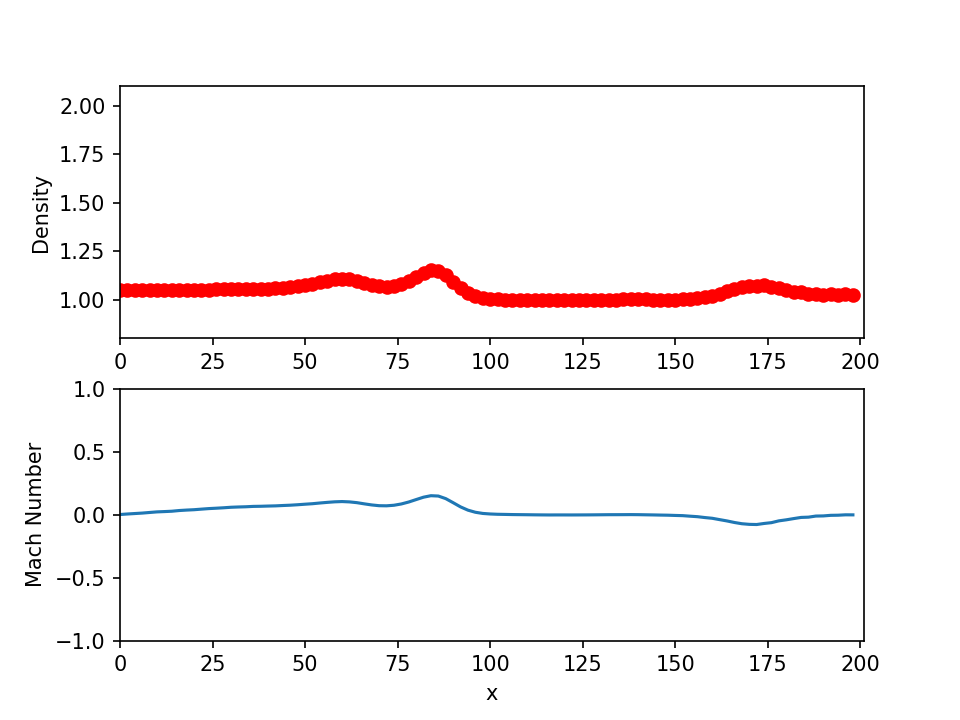

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Ngrid = 100 # grid size
Nsteps = 5000 # number of timesteps
dt = 0.1
dx = 2.0
kappa = 1 
gamma = 5/3


x = np.arange(Ngrid)*dx # grid
f1 = np.ones(Ngrid) # density
f2 = np.zeros(Ngrid) # momentum density
f3 = np.ones(Ngrid) # Energy density
P = kappa * (f1**gamma) # pressure
cs2 = gamma*P/f1 # sound speed squared
u = np.zeros(Ngrid+1) # advective velocity
M = (f2/f1)/np.sqrt(cs2) # u = momentum / density

def advection(f, u, dt, dx):
    # calculate the flux terms
    J = np.zeros(len(f)+1) 
    J[1:-1] = np.where(u[1:-1] > 0, f[:-1] * u[1:-1], f[1:] * u[1:-1])
    # depending on if advection is positive or negative,
    #the flux is coming from the left (positive) or right (negative)
    # flux is zero at the boudaries, so first and last term are 0 (reflective boundary condition)
    f -= (dt/dx) * (J[1:] - J[:-1]) # update
    return f

# Apply initial gaussian pertubation to the energy
Amp, sigma = 0.5, Ngrid/10
f1 += Amp * np.exp(-(x - x.max()/2) ** 2 / sigma ** 2)
f2 += Amp * np.exp(-(x - x.max()/2) ** 2 / sigma ** 2)
f3 += Amp * np.exp(-(x - x.max()/2) ** 2 / sigma ** 2)

# plot
plt.ion()
fig, ax = plt.subplots(2,1)

x1, = ax[0].plot(x, f1, 'ro')
x2, = ax[1].plot(x, M)

ax[0].set_xlim([0, dx*Ngrid+1])
ax[0].set_ylim([0.8, 2.1])
ax[1].set_xlim([0, dx*Ngrid+1])
ax[1].set_ylim([-1, 1])

ax[1].set_xlabel('x')
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Mach Number')
fig.canvas.draw()


for ct in range(Nsteps):
    # advection velocity at the cell interface
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))

    # update density, momentum and energy
    f1 = advection(f1, u, dt, dx)
    f2 = advection(f2, u, dt, dx)
    f3 = advection(f3, u, dt, dx)

    # add the source term
    f2[1:-1] -= (dt / dx) * cs2[1:-1]/gamma * (f1[2:] - f1[:-2]) # 0.5???
    f3[1:-1] -= (dt / dx) * (f2[1:-1]/f1[1:-1] * cs2[1:-1]/gamma * (f1[2:] - f1[:-2]) +
                             cs2[1:-1]/gamma * f1[1:-1] * ((f2[:-2] / f1[:-2]) + (f2[2:] / f1[2:])))

    # correct for source term at the boundary (reflective)
    f2[0] -= 0.5 * (dt / dx) * cs2[0]/gamma * (f1[1] - f1[0])
    f2[-1] -= 0.5 * (dt / dx) * cs2[-1]/gamma * (f1[-1] - f1[-2])
    
    f3[0] -= 0.5 * (dt / dx) * (f2[0]/f1[0] * cs2[0]/gamma * (f1[1] - f1[0]) + cs2[0]/gamma * f1[0] * u[0])
    f3[-1] -= 0.5 * (dt / dx) * (f2[-1]/f1[-1] * cs2[-1]/gamma * (f1[-1] - f1[-2]) + cs2[-1]/gamma * f1[-1] * u[-1])
    
    P = kappa * (f1**gamma) # pressure
    cs2 = gamma*P/f1 # sound speed squared
    M = (f2/f1)/np.sqrt(cs2) # u = momentum / density
    
    # update the plot
    x1.set_ydata(f1)
    x2.set_ydata(M)
    fig.canvas.draw()
    plt.pause(0.001)

In [2]:
## Answer the Questions